#**Description**

##**Background and Context**

You are a Data Analyst for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Analyst at "Visit with us" travel company has to analyze the customers' data and information from the dataset provided. Clean the data by finding the duplicates, treat the missing values and outliers. Use appropriate visualizations to identify the patterns and insights - Customer Profiling - Create a profile of the customers (for example demographic information) who purchased a package. The profile has to be created for each of the 5 packages - Basic, Standard, Deluxe, Super Deluxe, and King. Provide at least 3 points to distinguish features for each package) - Any other exploratory deep dive.

##**Objective**
- To treat the missing values, outliers.
- Use visualizations to identify the patterns and insights
- Customer Profiling - Create a profile of the customers who purchased a package. The profile has to be created for each of the 5 packages - Basic, Standard, Deluxe, Super Deluxe, and King.


##**Data Dictionary**

####**Customer details:**

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
   - Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

####**Customer interaction data:**

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


In [ ]:
#importing all the necessary libraries needed for computing, visualizing, model building.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing the google drive and mounting it.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the dataset and storing in a dataframe name 'data'
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Tourism.xlsx', sheet_name=1)

In [ ]:
#checking the number of rows and columns of the dataset
data.shape

(4888, 20)

In [ ]:
#copying the dataset to other variable 'df' and using it for further process.
df = data.copy()
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


- The above table shows the first 10 rows of the dataset. And look like we have some missing values as the Age column of the 4th customer is Nan.

In [ ]:
#checking the shapee once again to see if the copy is successful.
df.shape

(4888, 20)

- There are 4888 rows and 20 columns in the dataset.

In [ ]:
#Let's find out the datatypes and non-null count of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We have 7 float columns, 7 integer columns, 6 object columns.
- Looks like some of the columns have missing values too. Columns with missing values are MonthlyIncome, NumberOfChildrenVisiting, NumberOfTrips, PreferredPropertyStar,  NumberOfFollowUps, DurationPitch, TypeofContract, Age.
- **ProdTaken is the Target variable(dependent variable)**  

In [ ]:
#Let's see if there are any duplicates in the dataset
df.duplicated().sum()

0

- No duplicates in the dataset.

In [ ]:
#let's see how many missing values in the columns
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- There are missing values in 8 columns which we will try to impute as much as possible so that we do not loose any significant information.

In [ ]:
#lets check the percentage of the missing values in the dataset
(df.isnull().sum()/df.shape[0])*100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

- We see that there is
   - 4.6% missing values in Age
   - 0.5% in TypeOfContact
   - 5.1% in DurationOfPitch
   - 0.9% in NumberOfFollowups
   - 0.5% in PreferredPropertyStar
   - 2.8% in NumberOfTrips
   - 1.3% in NumberOfChildrenVisiting
   - 4.7% in MonthlyIncome

The percentage of missing values in each column is very less but we can not drop them all as there are many columns with missing values and deleting them together will lead to a data loss. We will explore them and see how we can impute these missing valuess.  

In [ ]:
#let's check the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


From the statistical summary we can infer few points:
- Age of the customers between 18 to 61, 50% of the customers are of age 36 or younger. And the mean is 37.6
- Duration of pitch is between 5 and 127, max is 127 so we need to closely look whether these outliers are genuine. 50% of the customers have duration 13 or less than 13.
- 50% of the customers have upto 3 people visiting along with them.
- 50% of the customers got upto 4 followups by the salesperson.
- 50% of the customers have only one child visiting with them.
- 75% of the customers have given upto 4 star rating to the property.
- Average number of trip is upto 4 for 75% of the customers. There is max value of 22 so need to check this outlier if its genuine.
- 75% of the customers gave upto 4 sales pitch satisfactory score.
- Avearge income of the customers is 23619. and 50% of the customers have Income less than the average.


**The customer ID column can be dropped as all the values are unique as its the Identification number and does not help in ny way to predict the purchase of the new package by the customer.**

In [ ]:
#dropping the CustomerID
df.drop(['CustomerID'], inplace=True, axis=1)

In [ ]:
#checkking the number of rows and columns
df.shape

(4888, 19)

**Lets check for the duplicates again since the customerID column is deleted now. With customerId column there are chances of not getting the duplicates if IDs are all unique numbers.**

In [ ]:
df.duplicated().sum()

141

In [ ]:
df[df.duplicated()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1514,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
1518,0,46.0,Company Invited,3,11.0,Small Business,Male,3,3.0,Deluxe,3.0,Single,5.0,1,5,1,1.0,Manager,20772.0
1531,0,38.0,Company Invited,1,35.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
1532,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
1536,0,36.0,Company Invited,1,17.0,Salaried,Male,3,4.0,Deluxe,4.0,Unmarried,2.0,0,4,1,1.0,Manager,21499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,0,36.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,Standard,4.0,Married,4.0,0,4,1,1.0,Senior Manager,28952.0
4788,0,31.0,Self Enquiry,1,14.0,Salaried,Male,3,4.0,Deluxe,3.0,Married,3.0,0,5,1,2.0,Manager,22169.0
4789,0,45.0,Self Enquiry,1,36.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0
4793,0,61.0,Self Enquiry,3,14.0,Small Business,Male,3,2.0,Deluxe,3.0,Married,2.0,1,5,0,1.0,Manager,23898.0


We got few duplicates after deleting the customerID and since we do not have the customer details like name,address,contact number and etc we can not tell them if they actually are duplicates. So these duplicated rows are just the coincidence and can not consider them as duplicates.

**Let's us see the unique value counts of all the categorical features**

In [ ]:
catcols = ['TypeofContact','Occupation', 'Gender', 'ProductPitched','MaritalStatus', 'Designation', 'ProdTaken', 'OwnCar', 'Passport', 'CityTier']

for column in catcols:
  print(df[column].value_counts())
  print('-'*50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
--------------------------------------------------
0    3968
1     920
N

- From the above categorical columns we can see that there are more customers who did Self Enquiry, Occupation is Salaried.
- There are three categories for Gender - Male, Female, Fe Male which is a data entry error. We will change the Fe Male to Female in the net code. And we cn see that even after the change we can see that there are more Male customers than Female.
- Most customers pitched the Basic product. Most customers are married.
- Most customers have the Designation of their work as Executive.
- Most of the customers are from Tier1 City.
- Single and unmarried status are not same category . Unmarried here means customers having partners.
- **Many customers did not take the package(ProdTaken) 3968. And this is the target variable**

**We will see the correlation of all these columns in our visualizations**

**Converting all these categorical features to category**

In [ ]:
df[catcols] = df[catcols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
#replacing the values of the column Gender - Fe Male with Female
df['Gender'].replace('Fe Male', 'Female', inplace=True)

In [ ]:
#checking the unique value counts of the Gender column
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

##Missing values

**Let's check the missing values of the Type of Contact column for any patterns**

In [ ]:
#printing the table with all the missing values in Type of contact
df[df['TypeofContact'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


- We can see above that for all the misssing values of Type of Contact even the Duration Pitch and the Monthly Income is also missing. All these are either Manager or Executive and many have Small Business.

- We can impute the values of Monthly income by grouping the rows with Occupation and Designation

**LET US TREAT THE MISSING VALUES OF THE MONTHLY INCOME FIRST**

There are 233 missing values in this column and let's impute them so that we don't lose information.

Let's check the boxplot of this column to see if there are any outliers. We will impute these missing columns depending on the outliers. If there are many outliers then median will be imputed and if there are no outliers then we will impute mean in the missing places.

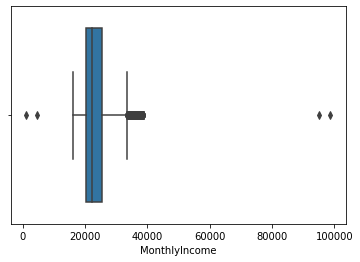

In [ ]:
sns.boxplot(data=df, x='MonthlyIncome')
plt.show()

- There are outliers so we will use median to impute the missing values.
- First we will group the data using the Occupation and Designation columns, then find the median of the income within the group and impute these median values.

In [ ]:
#grouping the column and calculating the median in each group
df.groupby(['Occupation', 'Designation'])[['MonthlyIncome']].median()

MonthlyIncome
Occupation     Designation                  
Free Lancer    AVP                       NaN
               Executive             18929.0
               Manager                   NaN
               Senior Manager            NaN
               VP                        NaN
Large Business AVP                   31809.0
               Executive             20748.0
               Manager               21997.0
               Senior Manager        26904.0
               VP                    36426.5
Salaried       AVP                   32288.0
               Executive             20689.0
               Manager               22841.0
               Senior Manager        26416.0
               VP                    35859.0
Small Business AVP                   32203.0
               Executive             20682.0
               Manager               23005.0
               Senior Manager        26332.5
               VP                    34859.0

In [ ]:
#imputing the median values in the nan
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(value=df.groupby(['Occupation', 'Designation'])['MonthlyIncome'].transform('median'))

In [ ]:
#checking if any missing values are left in the MonthlyIncome column
df['MonthlyIncome'].isnull().sum()

0

In [ ]:
#printing the column which has the null values
df.isnull().sum()[df.isnull().sum()>0]

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
dtype: int64

In [ ]:
#code to check the missing values of NumberOfChildrenVisiting column
pd.set_option('display.max_rows', 200)
df[df['NumberOfChildrenVisiting'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
851,0,56.0,Self Enquiry,1,10.0,Large Business,Female,3,3.0,King,5.0,Married,5.0,0,4,0,NaN,VP,34943.0
898,0,43.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,King,3.0,Divorced,4.0,0,5,1,NaN,VP,34740.0
918,0,51.0,Company Invited,3,15.0,Salaried,Male,2,3.0,King,4.0,Married,5.0,1,4,1,NaN,VP,34847.0
956,0,56.0,Self Enquiry,2,14.0,Salaried,Male,2,3.0,King,4.0,Single,7.0,0,4,1,NaN,VP,34717.0
1009,0,58.0,Self Enquiry,1,6.0,Small Business,Female,3,3.0,King,5.0,Divorced,4.0,1,1,1,NaN,VP,34701.0


Let us further observe the patterns between Number of Person Visiting and Number of Children Visiting.

In [ ]:
df[(df['NumberOfPersonVisiting']==3) & (df['NumberOfChildrenVisiting']==2)].shape[0]

1006

In [ ]:
df[(df['NumberOfPersonVisiting']==1) & (df['NumberOfChildrenVisiting']==1)].shape[0]

0

from the above codes we can see that the Number of children visiting is either 0 or 1 if the number of person visiting is 2 and it is 0 if the number of person visiting is 1.

**SO let's impute all the missing values of the Number of Children visiting column with the mode value grouped by the Number of Person visiting.**

In [ ]:
df.groupby(['NumberOfPersonVisiting'])['NumberOfChildrenVisiting'].agg(pd.Series.mode)

NumberOfPersonVisiting
1    0.0
2    1.0
3    2.0
4    1.0
5    2.0
Name: NumberOfChildrenVisiting, dtype: float64

In [ ]:
#code to impute the missing values with the mode groupby NumberOfPersonVisiting
df['NumberOfChildrenVisiting'] = df.groupby(['NumberOfPersonVisiting'])['NumberOfChildrenVisiting'].apply(lambda x:x.fillna(x.mode().iloc[0]))

In [ ]:
#checking whether it imputed all the missing values
df['NumberOfChildrenVisiting'].isnull().sum()

0

**Lets now impute the Type of contact column**

In [ ]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

since there are only 25 missing values lets impute the missing values with its mode(Self Enquiry)

In [ ]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')

In [ ]:
#checking if any missing value are left out.
df['TypeofContact'].isnull().sum()

0

**Let us now impute for Numberoffollowups**

In [ ]:
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [ ]:
df.groupby(['Designation'])['NumberOfFollowups'].median()

Designation
AVP               4.0
Executive         4.0
Manager           4.0
Senior Manager    4.0
VP                4.0
Name: NumberOfFollowups, dtype: float64

In [ ]:
df.groupby(['Gender','Occupation'])['NumberOfFollowups'].median()

Gender  Occupation    
Female  Free Lancer       NaN
        Large Business    4.0
        Salaried          4.0
        Small Business    4.0
Male    Free Lancer       4.5
        Large Business    4.0
        Salaried          4.0
        Small Business    4.0
Name: NumberOfFollowups, dtype: float64

In [ ]:
df.groupby(['ProductPitched'])['NumberOfFollowups'].median()

ProductPitched
Basic           4.0
Deluxe          4.0
King            4.0
Standard        4.0
Super Deluxe    4.0
Name: NumberOfFollowups, dtype: float64

From the above code we can see that most of the customers grouped by product pitch/occupation/designation/gender have number of followups as 4 so we will impute the missing values with 4.



In [ ]:
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(4.0)

In [ ]:
#code to check for any missing values left after imputing
df['NumberOfFollowups'].isnull().sum()

0

**Lets now impute for Preferred property star**

In [ ]:
df.groupby(['Gender','Occupation','Designation'])['PreferredPropertyStar'].median()

Gender  Occupation      Designation   
Female  Free Lancer     AVP               NaN
                        Executive         NaN
                        Manager           NaN
                        Senior Manager    NaN
                        VP                NaN
        Large Business  AVP               4.0
                        Executive         4.0
                        Manager           3.0
                        Senior Manager    3.0
                        VP                3.0
        Salaried        AVP               3.0
                        Executive         3.0
                        Manager           3.0
                        Senior Manager    4.0
                        VP                3.0
        Small Business  AVP               3.0
                        Executive         3.0
                        Manager           3.0
                        Senior Manager    3.0
                        VP                3.0
Male    Free Lancer     AVP              

In [ ]:
df.groupby(['ProductPitched'])[['PreferredPropertyStar']].median()

,PreferredPropertyStar
ProductPitched,
Basic,3.0
Deluxe,3.0
King,3.0
Standard,3.0
Super Deluxe,3.0


From the above codes, we can infer that most of the customers gave 3 start rating to the property so lets impute 3 in its missing places.

In [ ]:
#code to impute the missing values with 3.0
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)
df['PreferredPropertyStar'].isnull().sum()

0

**Lets check for the Age column to impute the missing values**

In [ ]:
df.groupby(['Gender', 'Designation'])[['Age']].median()

Age
Gender Designation         
Female AVP             48.0
       Executive       32.0
       Manager         37.0
       Senior Manager  38.0
       VP              50.0
Male   AVP             49.0
       Executive       32.0
       Manager         36.0
       Senior Manager  39.0
       VP              47.0

**Imputing the missing values of Age by the median values grouped by customer's Gender and designation.**

In [ ]:
df['Age'] = df['Age'].fillna(value = df.groupby(['Gender','Designation'])['Age'].transform('median'))
df['Age'].isnull().sum()

0

**The customers who are Free Lancers are only two, so let's see these 2 rows if there are any missing values.**

**We can easily drop them as deleting just 2 from the total of 4888 doesnot lose information and even a category will be dropped as well, thus, reducing a column while doing One-Hot encoding.**

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

DurationOfPitch    251
NumberOfTrips      140
dtype: int64

In [ ]:
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
2556,0,55.0,Company Invited,2,33.0,Salaried,Female,2,3.0,Super Deluxe,3.0,Single,NaN,1,3,1,1.0,AVP,36006.0
2563,0,44.0,Company Invited,3,33.0,Salaried,Male,4,4.0,Super Deluxe,3.0,Divorced,NaN,1,2,0,1.0,AVP,35637.0
2567,0,52.0,Self Enquiry,1,13.0,Salaried,Male,3,4.0,King,3.0,Single,NaN,0,5,1,1.0,VP,38215.0
2591,0,42.0,Company Invited,1,17.0,Salaried,Male,4,5.0,Super Deluxe,5.0,Married,NaN,0,2,1,1.0,AVP,35859.0
2630,0,41.0,Self Enquiry,1,11.0,Small Business,Female,3,4.0,King,3.0,Divorced,NaN,0,5,0,2.0,VP,37711.0


Most of the customers with missing NumberOfTrips values are either married/choosed King Product/VP designation

Let us see the correlation map to see for any relationship with the number of trips column to impute for its missing values.

##Multivariate Analysis

For the Numeric columns

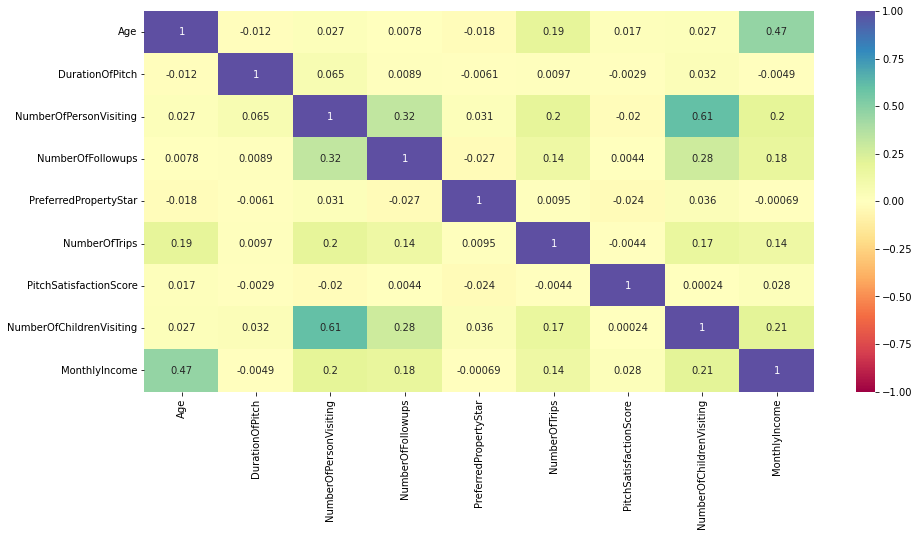

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

**The below are the insights driven from the above heatmap**
- **Age and monthly income** are **positively correlated** and its obvious that as age increases the monthly income increases increasing the job position(designation).
- As **Age** increases the **number of trip** too increases which is obvious.
- Age doesnot showw much correlation with other attributes like NumberOfChildrenVisiting, PitchSatisfactionScore, Number of followups, number of person visiting, preferredpropertystar, Duration of pitch.


- **Duration of Pitch** doesnot show much correlation with any of the numeric attributes like income, Number of children/person visiting, pitch satisfaction score, number of trips, number of followups, preferred property ratings.


- **Number of Persons** visiting is **positively correlated** with **number of children visiting** so which means the company has lots of family customers with children and the company has kid-friendly places to visit.
- **Numberof person visiting has a weak positive correlation with income and number of trips** as the income is more, customers tend to go on tours in groups. And the customer tend to plan for more trips.
- **Number of persons is also positively correlated to number of followups** as the salesperson tend to followup more on the bigger group of people(customers) for bigger sales.

- **Number Of followups**  by salesperson is also a bit **positively correlated** to **income,number of person/children visiting, number of trips** as the salesperson tend to contact the person with good income(who can afford), big groups with kids, and customers who like to tour a lot(more number of Trips) for good sales and profits.

- **PreferredPropertyStar** is not correlated to any of the numerical attributes(income, group size with/without kids, number of trips, followups, duration of pitch, pitchsatisfactory score)
- **NumberOfTrip** is a bit **positively correlated** to **income, Number of children/person visiting** as people with good income tend to plan for more trips and people with kids/friends/good company would like to explore and make memories for life.
- **Pitch satisfaction Score** does not show much correlation to any of the numeric attributes.
- **NumberOfChildrenVisiting** is **positively correlated** with **income** as good income means a customer can plan for trips as he can afford to have some goodtime with kids and family.

Since NumberofChildrenVisiting and NumberOfFollowups are correlated with Number of Trips, lets impute the median for the missing values of Number of Trips groupby Number of children visiting and number of followups.

In [ ]:
df.groupby(['NumberOfChildrenVisiting','NumberOfFollowups'])['NumberOfTrips'].median()

NumberOfChildrenVisiting  NumberOfFollowups
0.0                       1.0                  2.0
                          2.0                  2.0
                          3.0                  2.0
                          4.0                  2.0
                          5.0                  2.0
1.0                       1.0                  2.0
                          2.0                  3.0
                          3.0                  2.0
                          4.0                  3.0
                          5.0                  3.0
                          6.0                  3.0
2.0                       1.0                  2.0
                          2.0                  3.0
                          3.0                  2.0
                          4.0                  3.0
                          5.0                  3.0
                          6.0                  3.0
3.0                       2.0                  3.0
                          3.0         

In [ ]:
df['NumberOfTrips']=df['NumberOfTrips'].fillna(value = df.groupby(['NumberOfChildrenVisiting','NumberOfFollowups'])['NumberOfTrips'].transform('median'))
df['NumberOfTrips'].isnull().sum()

0

**Let us impute the missing values of DuraationOfPitch column**

There are 251 missing values in the duration of pitch column and usually it depends on Productpitched and number of followups by the salesperson. So the let us impute the median values grouped by these two columns

In [ ]:
df.groupby(['ProductPitched','NumberOfFollowups'])['DurationOfPitch'].median()

ProductPitched  NumberOfFollowups
Basic           1.0                  14.0
                2.0                  15.0
                3.0                  13.0
                4.0                  13.0
                5.0                  12.0
                6.0                  15.5
Deluxe          1.0                  11.5
                2.0                  13.0
                3.0                  14.0
                4.0                  14.0
                5.0                  13.0
                6.0                  13.0
King            1.0                  15.0
                2.0                  15.5
                3.0                  10.0
                4.0                  11.0
                5.0                  10.0
                6.0                   9.0
Standard        1.0                  14.0
                2.0                  15.0
                3.0                  14.0
                4.0                  14.0
                5.0                  14.0


In [ ]:
df['DurationOfPitch']=df['DurationOfPitch'].fillna(value=df.groupby(['ProductPitched','NumberOfFollowups'])['DurationOfPitch'].transform('median'))
df['DurationOfPitch'].isnull().sum()

0

In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**All the missing values are imputed in the dataset**

**We also saw that there are only 2 freelancers so let's drop these rows in that way the number of columns would also decrease by one while we are creating the dummines before training and testing the data**

In [ ]:
df[df['Occupation'] == 'Free Lancer']

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0


In [ ]:
df = df.drop(2).reset_index(drop=True)


In [ ]:
df = df.drop(2445).reset_index(drop=True)

In [ ]:
df[df['Occupation'] == 'Free Lancer']

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


##Exploratory Data Analysis(EDA)

###Univariate Analysis

**Let's check the behavior of all the attributes each to see its distribution, outliers, skewness.**

**LET'S SEE THE DISTRIBUTION ON NUMERIC COLUMNS FIRST**

**Distribution of Age**

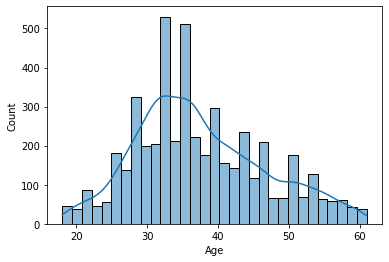

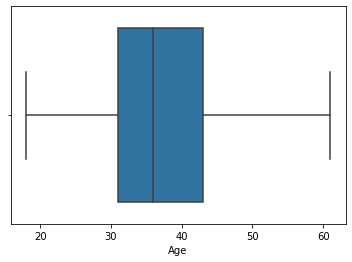

In [ ]:
sns.histplot(data=df, x='Age', kde=True)
plt.show()
sns.boxplot(data=df, x='Age')
plt.show()

- the distribution of Age is almost uniform with most of its values in the middle and mean 37 nd median 36.
- The boxplot shows no outliers.

**Distribution of DurationOfPitch**

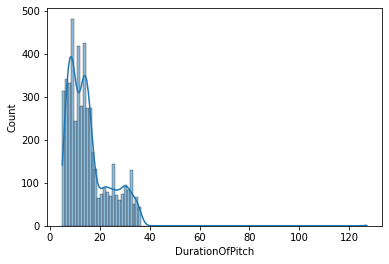

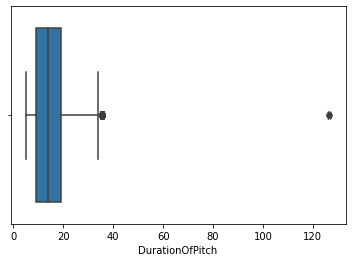

In [ ]:
sns.histplot(data=df, x='DurationOfPitch', kde=True)
plt.show()
sns.boxplot(data=df, x='DurationOfPitch')
plt.show()

- The distribution is right skewed and the boxplot shows some outliers at 120.
- Lets see the outliers of the colummn

In [ ]:
df[df['DurationOfPitch']>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1433,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3876,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


- There are only 2 rows with the outliers and the values are way too high,doesnot look genuine so we can either drop them or impute them. But I want to impute them with them with the Q3 + 1.5IQR     

In [ ]:
Q1 = df['DurationOfPitch'].quantile(0.25)
Q3 = df['DurationOfPitch'].quantile(0.75)
IQR = Q3-Q1
upper_whisker = Q3 + 1.5*IQR
upper_whisker

34.0

In [ ]:
#replacing the upper_whisker value with both of the outliers
df['DurationOfPitch'].replace(126.0, 36.5, inplace=True)
df['DurationOfPitch'].replace(127.0, 36.5, inplace=True)

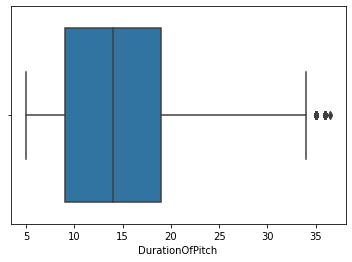

In [ ]:
#boxplot for Duration of pitch after imputing the outliers
sns.boxplot(data=df, x='DurationOfPitch')
plt.show()

**Distribution of NumberOfPersonVisiting**

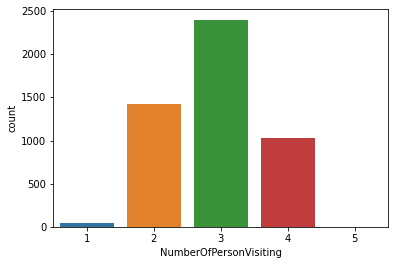

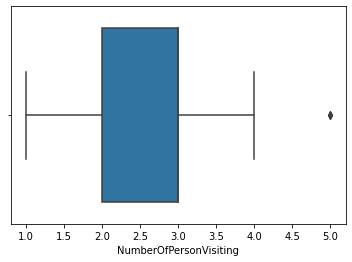

In [ ]:
sns.countplot(data=df, x='NumberOfPersonVisiting')
plt.show()
sns.boxplot(data=df, x='NumberOfPersonVisiting')
plt.show()

- Most of the customers has 3 Person visiting along with them.
- We see an outlier at 5. But in general if a family is going on trip a family can have a minimum of 4 to 5 memebers in it or a person can choose to plan a trip with relatives, cousins or friends. So this is not a data entry error.  


- lets see the unique value counts of this column to see the value counts for each of its unique value.
- And also the rows that have 5 Number of Persons Visiting.

In [ ]:
df['NumberOfPersonVisiting'].value_counts()

3    2401
2    1418
4    1025
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [ ]:
df[df['NumberOfPersonVisiting'] == 5]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3975,0,60.0,Self Enquiry,3,32.0,Salaried,Female,5,4.0,Standard,5.0,Unmarried,2.0,0,3,1,2.0,Senior Manager,26315.0
4000,0,31.0,Self Enquiry,1,9.0,Salaried,Male,5,5.0,Deluxe,3.0,Married,3.0,0,4,1,2.0,Manager,22830.0
4103,0,28.0,Self Enquiry,1,16.0,Small Business,Female,5,4.0,Basic,4.0,Single,3.0,0,3,0,2.0,Executive,20957.0


From the above codes, we can consider that **the outliers are genuine** and from the customers' age, gender, Maritalstatus we can infer that the customer might have planned to trip with friends/cousins(in case of single), customer with 60 might hve planned with her partner's family (customer here is unmarried).

**So we can keep these or since its just 5 rows we can lso impute them with upper whisker value(which is 4 from the boxplot) so this reduces the value by just one which don't make much of a difference**  

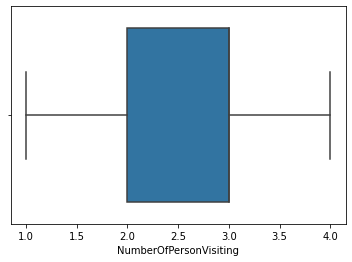

In [ ]:
#replacing the outliers with the value 4
df['NumberOfPersonVisiting'].replace(5,4,inplace=True)
sns.boxplot(data=df, x='NumberOfPersonVisiting')
plt.show()

- Boxplot of the Numer of Person Visiting column with no outliers.

**Distribution of NumberofFollowups**

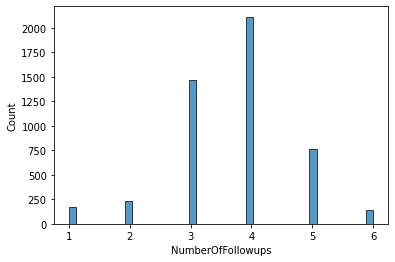

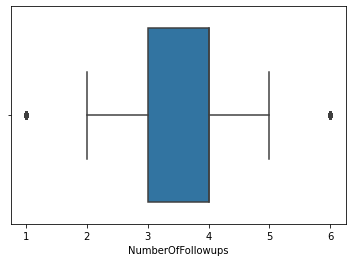

In [ ]:
sns.histplot(data=df, x='NumberOfFollowups')
plt.show()
sns.boxplot(data=df, x='NumberOfFollowups')
plt.show()

- The histogram shows that most of the customers followed up for 4 times and then 3 by the salesperson.
- The boxplot shows that the outliers of 1 and 6 for the customerss who was followed up by salesperson.

In [ ]:
df['NumberOfFollowups'].value_counts()

4.0    2112
3.0    1466
5.0     767
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

From the above we can infer that the outliers are true as the number of followups are 1 to 6 and its not a data entry error or any abnormal values. And deleting these outliers would result in data/information loss. And treating all these 300 rows would result in data integrity.

**We are not imputing or deleting these outliers as they are TRUE, so let's keep them as it is**

**Distribution for PreferredPropertyStar**

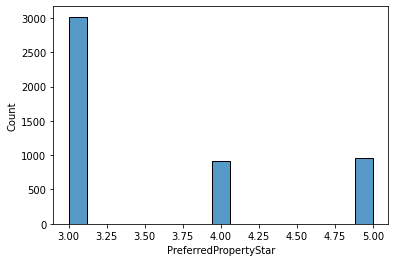

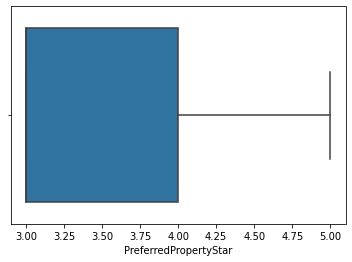

In [ ]:
sns.histplot(data=df, x='PreferredPropertyStar')
plt.show()
sns.boxplot(data=df, x='PreferredPropertyStar')
plt.show()

- The rating are between 3 and 5 which says that the customers are pretty satisfies with the company.
- from the boxplot, we cn see that's there are no outliers or abnormal ratings.

**Distribution for Number of trips column**

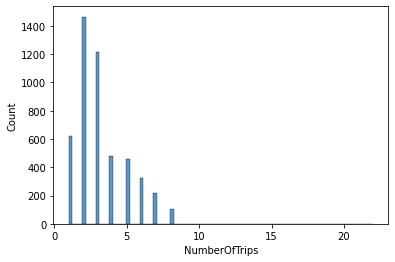

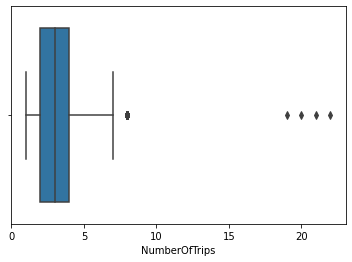

In [ ]:
sns.histplot(data=df, x='NumberOfTrips')
plt.show()
sns.boxplot(data=df, x='NumberOfTrips')
plt.show()

let's check the number of rows with the outliers.

In [ ]:
#Calculating the upper whisker value for the column
Q1 = df['NumberOfTrips'].quantile(0.25)
Q3 = df['NumberOfTrips'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
upper

7.0

In [ ]:
#code to see how many rows with Number of trips more than 7(upper whisker value)
df[df['NumberOfTrips']>7]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
384,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
815,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2451,0,37.0,Self Enquiry,1,34.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,8.0,0,3,1,1.0,Manager,23915.0
2556,0,35.0,Self Enquiry,1,13.0,Salaried,Female,3,5.0,Deluxe,4.0,Married,8.0,0,3,0,2.0,Manager,23183.0
2577,0,37.0,Self Enquiry,1,13.0,Small Business,Male,3,4.0,Deluxe,4.0,Married,8.0,0,4,1,2.0,Manager,23619.0
2601,0,35.0,Company Invited,3,9.0,Small Business,Female,4,4.0,Basic,3.0,Divorced,8.0,0,5,1,3.0,Executive,20909.0
2603,0,28.0,Company Invited,1,16.0,Small Business,Male,3,4.0,Basic,4.0,Married,8.0,0,3,0,1.0,Executive,20702.0
2660,0,46.0,Company Invited,3,13.0,Small Business,Female,3,5.0,Standard,3.0,Unmarried,8.0,0,4,1,1.0,Senior Manager,27543.0
2663,0,34.0,Self Enquiry,1,11.0,Small Business,Female,3,5.0,Basic,4.0,Divorced,8.0,0,4,0,1.0,Executive,21300.0
2689,0,35.0,Self Enquiry,1,9.0,Salaried,Male,3,5.0,Deluxe,5.0,Divorced,8.0,0,4,0,2.0,Manager,24635.0


In [ ]:
#code to see the extreme outliers
df[df['NumberOfTrips']>=10]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
384,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
815,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2827,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3258,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


- There are 105 rows with outliers and in them only 4 rows with Number of trips in 20's(outliers which are extreme) and if we see the rows the age is from 30s to 40s and designation Manager/Executive from Tier1 city, And they are singles/unmarried.
- The 101 rows are true outliers as the value is 8 Number of Trips and not extreme value.  
- The 4 rows(with number of trips around 20) may be genuine or a data entry error which can either be imputed or keep them as it is but we will impute them so that while building the model the fitted line does not get distorted with these outliers.

- **Imputing the extreme outliers with the upperwhisker value(7.0)**

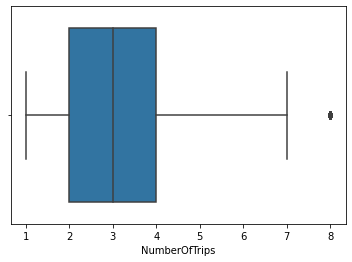

In [ ]:
#replacing the extreme outliers and printing the boxplot
df['NumberOfTrips'].replace(19.0, 7.0, inplace=True)
df['NumberOfTrips'].replace(20.0, 7.0, inplace=True)
df['NumberOfTrips'].replace(21.0, 7.0, inplace=True)
df['NumberOfTrips'].replace(22.0, 7.0, inplace=True)
sns.boxplot(data=df, x='NumberOfTrips')
plt.show()

**Distribution of PitchSatisfactionScore column**

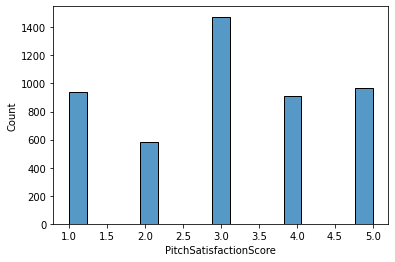

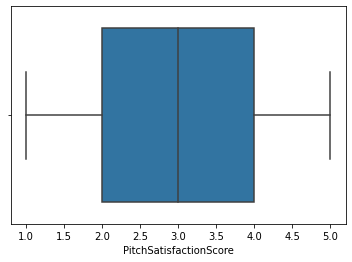

In [ ]:
sns.histplot(data=df, x='PitchSatisfactionScore')
plt.show()
sns.boxplot(data=df, x='PitchSatisfactionScore')
plt.show()

- Many customers gave 3 score for the Sales pitch satisfaction.
- There are no outliers, no abnormal values or data entry errors here.

**Distribution for NumberOfChildrenVisiting column**

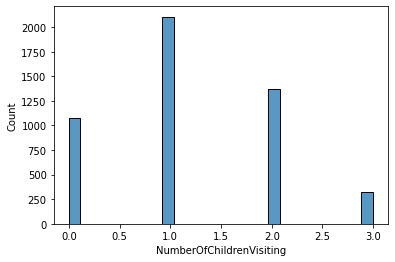

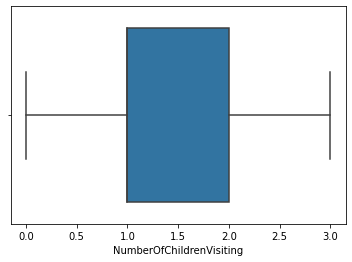

In [ ]:
sns.histplot(data=df, x='NumberOfChildrenVisiting')
plt.show()
sns.boxplot(data=df, x='NumberOfChildrenVisiting')
plt.show()

- Most of the customers are touring with 1 child and then comes customers touring with 2 children.
- very less customers are with 3 children.
- 25th percentile and 50th percentile(median) is 1.

**Distribution of Monthly Income of the customers**

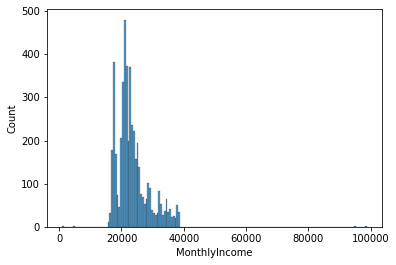

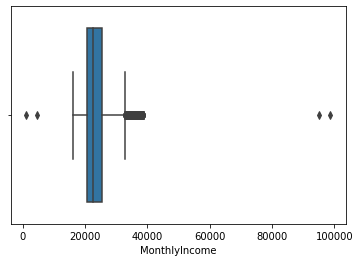

In [ ]:
sns.histplot(data=df, x='MonthlyIncome')
plt.show()
sns.boxplot(data=df, x='MonthlyIncome')
plt.show()

- There are outliers on the left and right side of the boxplot.
As the income depends on the Age, Designation, Occupation, Gender we can not say that these outliers are not genuine. But let us look at them closely and decide on them.
- Let's check these extreme values and their patterns.

In [ ]:
#code to check the salaries that are lower then the lower whisker
df[df['MonthlyIncome']<10000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
141,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2584,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


In [ ]:
df[df['MonthlyIncome']>40000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
37,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2480,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


The rows show very low salaries who are Managers in Large Business so this may be a data entry error. we will impute the values in these two columns with the lower whisker value.

The rows with high salaries show very high it may or maynot be genuine but we will impute them as they are only two and this may cause distort while fitting the regression line.

- calculating the upper and lower whiskers and imputing them for the extreme outliers.

In [ ]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
print(lower)
upper = Q3 + 1.5*IQR
print(upper)

13067.75
32847.75


In [ ]:
#imputing the upper and lower whisker values to only the extreme outliers.
df['MonthlyIncome'].replace(1000.0, 13075.4, inplace=True)
df['MonthlyIncome'].replace(4678.0, 13075.4, inplace=True)
df['MonthlyIncome'].replace(95000.0, 32834.4, inplace=True)
df['MonthlyIncome'].replace(98678, 32834.4, inplace=True)

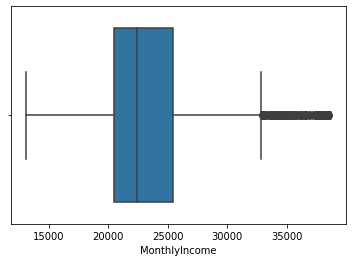

In [ ]:
#lets check the boxplot now
sns.boxplot(data=df, x='MonthlyIncome')
plt.show()

**DISTRIBUTION ON CATEGORICAL COLUMNS**

**Let us see the distribution of City Tier**

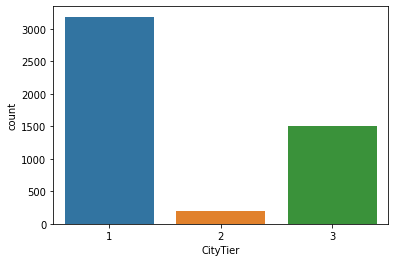

In [ ]:
sns.countplot(data=df, x='CityTier')
plt.show()

In [ ]:
#Lets check the value_counts of the CityTier column
print(df['CityTier'].value_counts())
print(df['CityTier'].value_counts(1))

1    3188
3    1500
2     198
Name: CityTier, dtype: int64
1    0.652476
3    0.307000
2    0.040524
Name: CityTier, dtype: float64


We can see that there are more customers from Tier1 which is the well developed city than the other two cities. So the customers in cityTier1 may be well educated or making good salaries or families with kids who would want to take a break, in between their busy life, and plan for trips . Whereas, the tier2 inspite of a developed city when compared to tier3 does not have many customers and its only 4% of the customers and tier3 being 30%of the customers.

**So we will explore this column further in relation to Monthlyincome, age, occupation, and others to see for any patterns.**

**Distribution of Type of Contact**

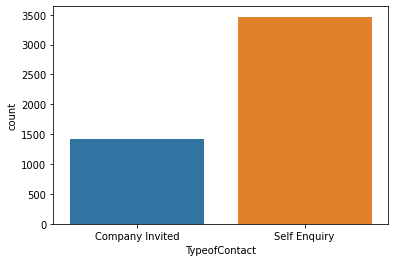

In [ ]:
sns.countplot(data=df, x='TypeofContact')
plt.show()

- There are more customers who visited the company by themselves.
- So from this the company should probably should also focus on publishing and to get good reviews from the regular customers so that they can recoomend to others.

**Distribution on Occupation**

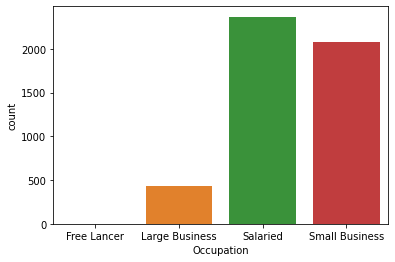

In [ ]:
sns.countplot(data=df, x='Occupation')
plt.show()

- customers who get Salaried and have Small Businesses are more compared to large busines and very very few freelancers.
- The company should focus on Salaried and Small business customers. Salaries customers might tour for pleasure and Small business may tour with their clients to impress them or as gratitude for theri business.  

**Distribution on Gender**

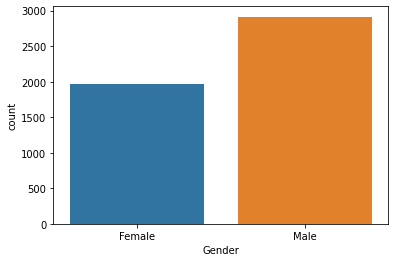

In [ ]:
sns.countplot(data=df, x='Gender')
plt.show()

- The comapny have more malee customers than females.

**Distribution on ProductPitch**

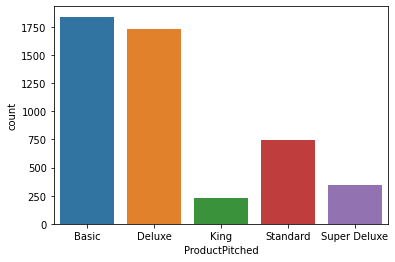

In [ ]:
sns.countplot(data=df, x='ProductPitched')
plt.show()

- Customers  have high preference for Basic and Deluxe Product and then comes the standard and superdeluxe.
- Very less customers prefers king product.

**Distribution for Customers with own Car**

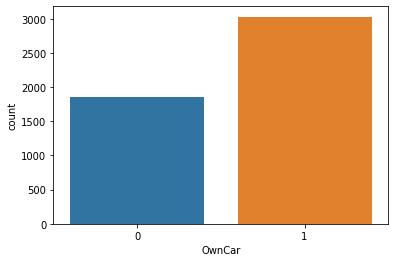

In [ ]:
sns.countplot(data=df, x='OwnCar')
plt.show()

- There are more customers who have their own vehicle.

In [ ]:
#code to get the actual number of customers who has own car or not
df['OwnCar'].value_counts()

1    3032
0    1854
Name: OwnCar, dtype: int64

- There are 3k customers with their own car
- And 1.8k customers who does not have a car.

**Marital Status**

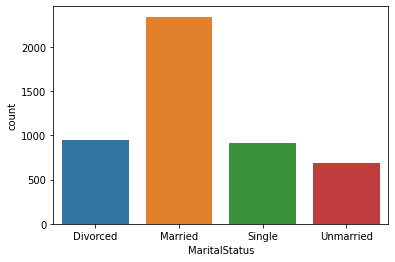

In [ ]:
sns.countplot(data=df, x='MaritalStatus')
plt.show()

- Most of the customers are Married.
- Single and Divorced customers have equal count.

**Distribution of Passport column**

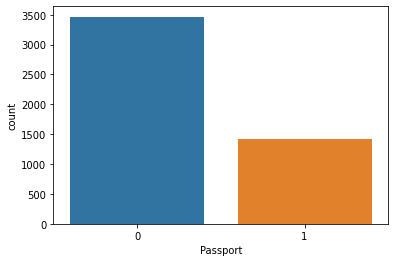

In [ ]:
sns.countplot(data=df, x='Passport')
plt.show()

- There are more customers who do not have passport.

**Distribution on Designation**

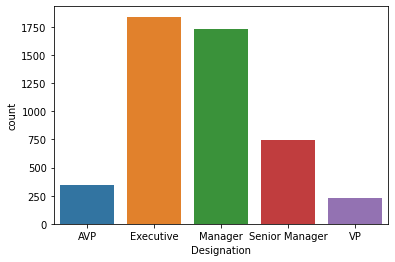

In [ ]:
sns.countplot(data=df, x='Designation')
plt.show()

- Many customers are either Executives or Managers.
- Very less number of customers are VP and AVP

**Distribution on Prodtaken**

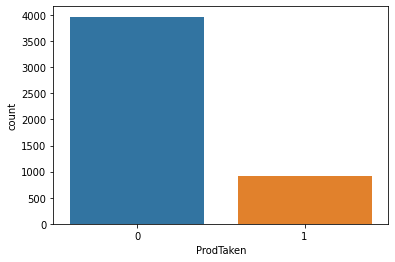

In [ ]:
sns.countplot(data=df, x='ProdTaken')
plt.show()

- We can see that many customers did not take the package.

##Bivariate analysis

**Relation between Income, Designation, Prodtaken**

<Figure size 2880x1440 with 0 Axes>

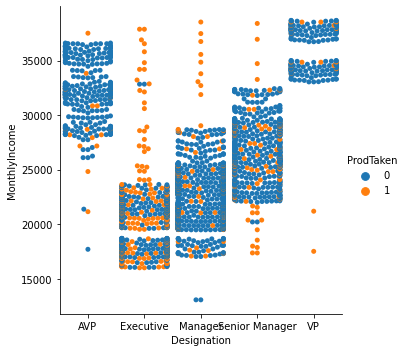

In [ ]:
plt.figure(figsize=(40,20))
sns.catplot(data=df, x='Designation', y='MonthlyIncome', hue='ProdTaken', kind='swarm')
plt.show()

From the abobe plot we cn see that many customers who are **Executive** and **Senior Managers** bought the package. Next comes the customers who are Managers.
- And many customers with income between 17000 to 25000 have bought the package.
- We can further see this in histogram below.

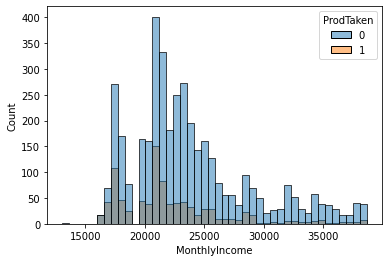

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', hue='ProdTaken')
plt.show()

**Relation between Occupation, Monthly Income, ProdTaken**

<Figure size 2880x1440 with 0 Axes>

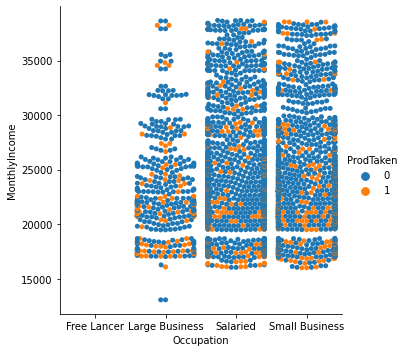

In [ ]:
plt.figure(figsize=(40,20))
sns.catplot(data=df, x='Occupation', y='MonthlyIncome', hue='ProdTaken', kind='swarm')
plt.show()

- The above graph is not clear about occupation and pckage purchased.

Let us use the other visualization.

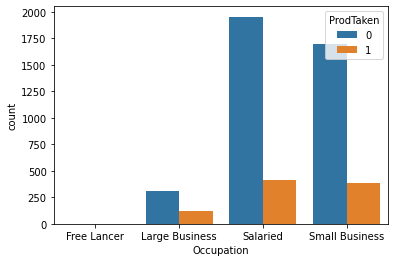

In [ ]:
sns.countplot(data=df, x='Occupation', hue='ProdTaken')
plt.show()

customers with Salaried and Small Business bought the packages more than the Large Business.

**Relation between the Product pitch and the prodtaken**

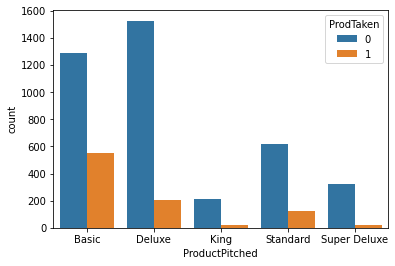

In [ ]:
sns.countplot(data=df, x='ProductPitched', hue='ProdTaken')
plt.show()

Many customers who choosed Basic product purchased the product then comes the Deluxe Product and finally Standard Product.

**Relation between Productpitched, Age, Prodtaken**

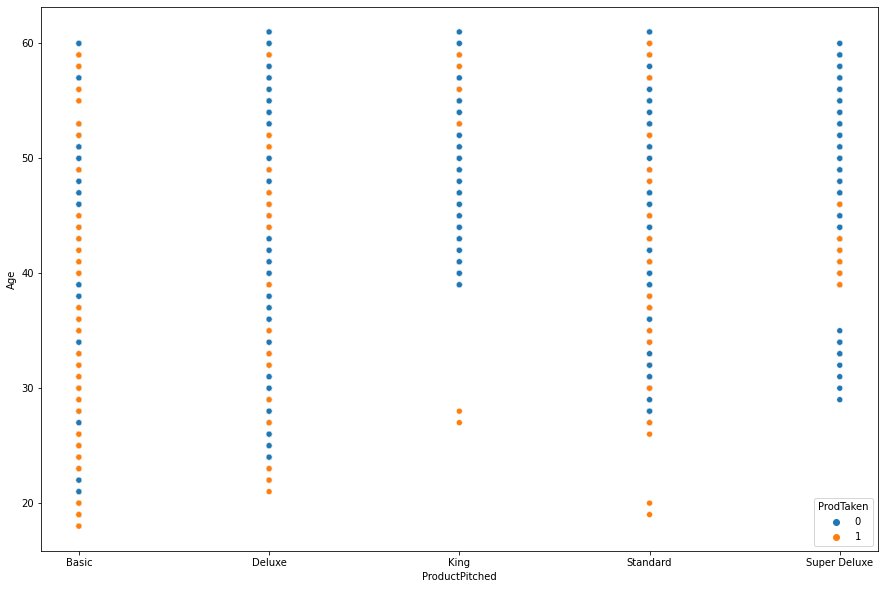

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x='ProductPitched', y='Age', hue='ProdTaken' )
plt.show()

- From the above graph, we can see that most of the customers choose to buy Basic package are of age between 19 to 60.
- And next is the Deluxe package who are of age 20 to 38 and 42 to 53.
- Next comes the Standard Package who are of age between 20 to 60.
- Super Deluxe product was bought by customers of age in 40s.

**From the above graphs, we can say may be the Products pricing of Basic, Deluxe,  Standard, Super Deluxe, King is low to high respectively.**

**Relation between Age and ProdTaken**

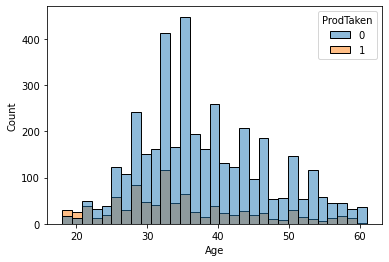

In [ ]:
sns.histplot(data=df, x='Age', hue='ProdTaken')
plt.show()

- From this histogram we can say that the age group from 21 to 40 have bought the package.

**Relation between Citytier and Prodtaken**

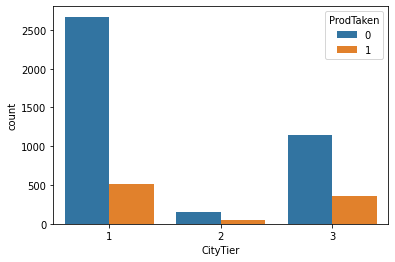

In [ ]:
sns.countplot(data=df, x='CityTier', hue='ProdTaken');

- Many Customers from Tier1 have bought the package. and then the City Tier3 stands 2nd.

**Relation between ProductPitched and Citytiers**

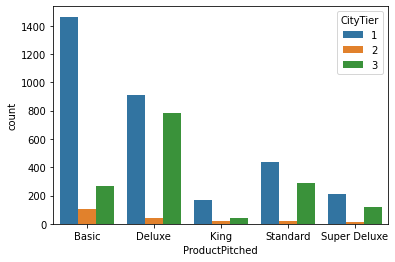

In [ ]:
sns.countplot(data=df, x='ProductPitched', hue='CityTier');

- Many customers are from Tier1 bought the basic product, then Deluxe, Standard.
- Many customers are from Tier1 and Teir3.

**Relation between Product Pitched and Number Of children Visiting**

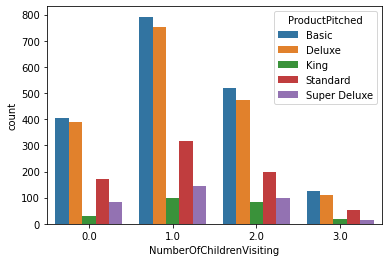

In [ ]:
sns.countplot(data=df, x='NumberOfChildrenVisiting', hue='ProductPitched');

- There are more number of customers with 1 children visiting and choosed for Basic and then Deluxe.
- customers having 0 and 2 children visiting also has Basic and Deluxe product taken.
- After the Basic and Deluxe the net product preference is the Standard.

**Relation between Number of Person Visiting and Product Pitched**

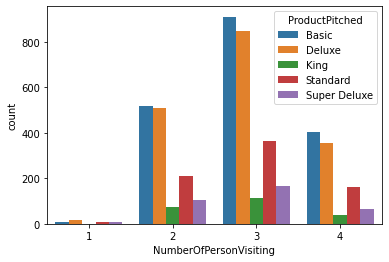

In [ ]:
sns.countplot(data=df, x='NumberOfPersonVisiting', hue='ProductPitched');

- Many customers with 3 people have first preference to Basic, second to Deluxe and the Standard.
- Many customers have a group 3, 2, 4 from higher to lower respectively.

**Relation between Product Pitched and Marital Status**

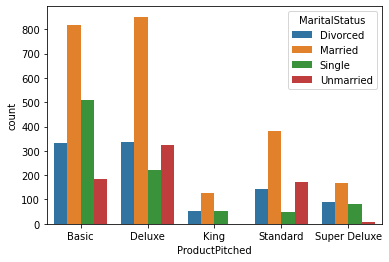

In [ ]:
sns.countplot(data=df, x='ProductPitched', hue='MaritalStatus');

- Many customers are Married and have Deluxe product choosen first and then comess the Basic, third is the Standard.
- Most Single customers took Basic Product.
- Most unmarried choosed Deluxe Product.
- Divorced highest preference is both Basic and Deluxe.

**Relation between Prodtaken and Children Visiting**

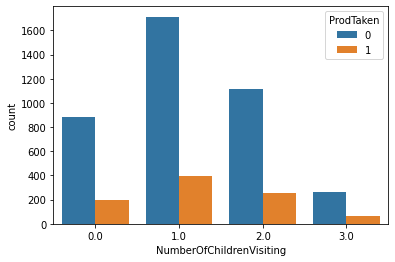

In [ ]:
sns.countplot(data=df, x='NumberOfChildrenVisiting', hue='ProdTaken')
plt.show()

- Most customers have 1 or 2 children visiting purchased the package.
- Net is the customers with 0 children.

**Relation between income and prodtaken**

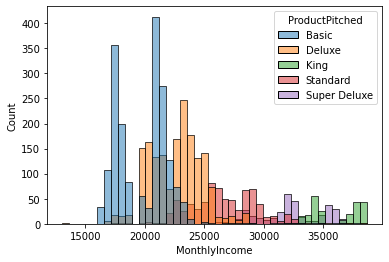

In [ ]:
sns.histplot(data=df, x='MonthlyIncome', hue='ProductPitched');

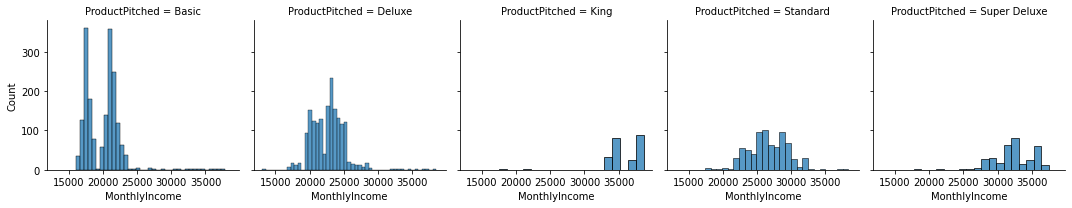

In [ ]:
#we can make this better by using subplots, dfferent histograms next to each other
g= sns.FacetGrid(df, col='ProductPitched')
g.map(sns.histplot, 'MonthlyIncome');

- income range from 17000 to 23000 choosed Basic
- Income range from 19000 to 25000 choosed Deluxe
- Income range from 33000 to 40000 choosed king
- income range from 22000 to 32000 choosed Standard
- income range from 27500 to 33000 choosed Super Deluxe

**Relation between Number of trips and Prostaken**

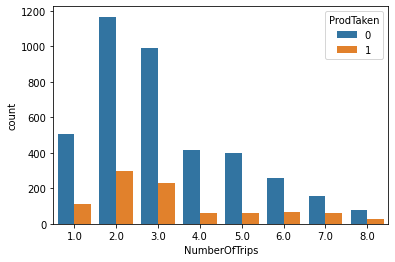

In [ ]:
sns.countplot(data=df, x='NumberOfTrips', hue='ProdTaken');

- Many customers with 2 and 3 number of trips purchased the package.

**Relationshio between Numberofpersonvisiting and prodtaken**

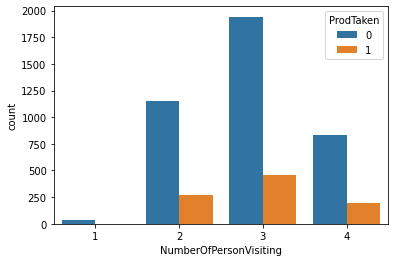

In [ ]:
sns.countplot(data=df, x='NumberOfPersonVisiting', hue='ProdTaken');

- people with group 3 have purchased the package more than other groups of 2,4.
- So may be if the group increased the package purchased chances also increases.

**Relation between MaritalStatus and ProdTaken**

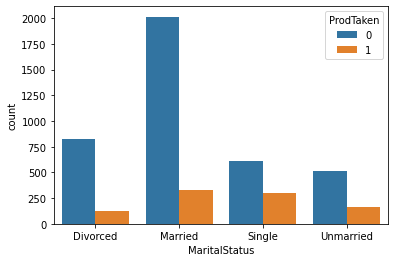

In [ ]:
sns.countplot(data=df, x='MaritalStatus', hue='ProdTaken');

- Married and single customers have taken the package more than the unmarried or divorced.

**relation between citytier and prodtaken**

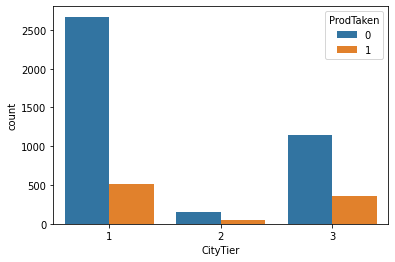

In [ ]:
sns.countplot(data=df, x='CityTier', hue='ProdTaken');

- more customers from Citytier 1 and 3 bought packages than tier2

**INSIGHTS AND RECOMMENDATIONS DEPENDING ON THE EDA**

- Many Married and Single customers tend to choose the Basic product first, then it is Deluxe followed by Standard. And there are chances that they buy the package.
- Many customers in group of 2, 3, 4 prefer the Basic Product first, then the deluxe, and last the standard. These customers tend to buy the package too if given discounts.
- Many customers with 1,2 and 0 children, tend to buy the Basic. Deluxe, Standard product. And they may buy the package if it is kidfriendly or include any specials for kids.
- Many customers with 2,3,1,4, number of trips tend to buy the package given some incentives to them
- Many from customers from Tier1 and Tier3 bought the package so the company should focus on these areas.
- Many customers with small business and Salaried bought the package and also preferred Basic and Deluxe products.
- Many customers of age 25 to 40 should be targeted to get the customers buy the package.
- Customers with good Salaries/Income should be focused to buy the package as they can afford the prices.

**CUSTOMER PROFILING**

**For Product Pitch:**
**BASIC**: Income of the customers range from 17000 to 23000. The Marital Status of the customers according to this Product preference is Married, Single, Divorced, Unmarried(high to low). customers with Most Number of person visiting is 3,2,4(high to low) and Most Number Of Children Visiting is 1,2,0(high to low).

**DELUXE**: Customers with income range 19000 to 25000. Customers with marital status Married, Divorced, Singles(high to low) prefer this product. customers with most Number of Person visiting is 3,2,4(high to low) and most number of children visiting is 1,2,0(high to low).

**STANDARD**: Customers with Income range between 22000 and 32000 prefer this product. Customers with marital status Married, Unmarried, Divorced(high to low) prefer this product. Most number of customers visit with a group of 3,2,4(higher preference to lower preference) choosed this product and the Number of Children with 1,2,0(higher to lower)preferred this product.

**SUPER DELUX**: Customers with Income range between 27500 and 33000 chossed this product. Most customers are Married and there is same ratio between Single and Divorced. Most of the customers are from Tier1 and tier3(high to low).

**KING**: Customers with Income range 33000 to 40000 prefer this product. Most of the customers are Married, almost same number of customers are Divorced/single. Most of the customers are of Age 40 to 60. Most of the customers are from tier1 city.

**PACKAGE PURCHASE**
- Many from City Tier1 purchased the package.
- Most of the customers are Married/Single(almost same ratio).
- Most of the customers with group 3, 2, 4 purchased the package.
- Most of the customers' number of Trips are 2(high), 3(low, compared to 2 person visiting) who purchased the package.
- Most of the customers are of Age 25 to 36, who purchased the package.
- Most of the customers who purchased the package choose Basic product.
- Most of the customers are Salaried and have Small Business.
- Most customers who purchased the package are Executives

**Insights and Business Recommendations**
- Income, Age, Duration of Pitch, Passport_1, Designation_Executive, Number of Followups, City Tier_3 are the most important features which play a significant role in predicting the purchase of the package.
- So the company should focus on the Income as higher the income then the customer can afford to plan for tours for some refreshment.
- The company needs to focus on the customers with an age 35 to 55 as they migh take the wellness tour for their health or to destress from the work pressure.
- The company should also focus on the Marital status as Singles are more tend to purchase the package for pleasure or to make friends or to maintain the relationship with friends/relatives/cousins. And its easy for them to purchase as they may have less commitments in life.
- Customes with passport tend to travel for long distances even to other countries for pleasure and some good memories with family/friends.
- Executives tend to plan for tours for business with officials and for self with family/friends.